### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# <font color='blue'> Project 3 : Buzz Prediction on Twitter
#### Regression task: Prediction of buzz value for Twitter.Data dataset. 

#### Libraries imported for all the model and plots. 

#### Inline plotting of graph is being used

In [288]:
import pandas as pd
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from  sklearn.preprocessing import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
from sklearn.pipeline import make_pipeline
import warnings
from scipy.stats import mstats
from sklearn.ensemble import BaggingRegressor
from  sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score, recall_score, precision_score
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)
%matplotlib inline 
pd.set_option('display.max_colwidth',-1)
warnings.filterwarnings('ignore')


#### Twitter Data used for Regression task of dependent variable : buzz

#### Reading lines from Twitter.data file into data frame twitter_data and replacing columns into new ones.

In [289]:
twitter_data = pd.read_csv('Twitter.data')
twitter_data.columns=('NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6',
                      'AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
                      'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6',
                      'BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6',
                      'NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6',
                      'AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4',
                      'AS(NAC)_5','AS(NAC)_6',
                      'CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
                      'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6',
                      'NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6',
                      'ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6',
                      'NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','buzz'
                      )
print(twitter_data.head(4))

twitter_data.shape

   NCD_0  NCD_1  NCD_2  NCD_3  NCD_4  NCD_5  NCD_6  AI_0  AI_1  AI_2  ...   \
0  2      1      0      0      0      0      4      2     1     0     ...    
1  1      0      0      0      0      4      1      1     0     0     ...    
2  1      0      0      1      0      0      1      1     0     0     ...    
3  0      1      0      0      1      2      3      0     1     0     ...    

   ADL_5  ADL_6  NAD_0  NAD_1  NAD_2  NAD_3  NAD_4  NAD_5  NAD_6  buzz  
0  0.0    1.0    2      1      0      0      0      0      4      0.5   
1  1.0    1.0    1      0      0      0      0      4      1      0.0   
2  0.0    1.0    1      0      0      1      0      0      1      2.5   
3  1.0    1.0    0      1      0      0      1      2      3      0.5   

[4 rows x 78 columns]


(583249, 78)

### Explore dataset

In [290]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583249 entries, 0 to 583248
Data columns (total 78 columns):
NCD_0        583249 non-null int64
NCD_1        583249 non-null int64
NCD_2        583249 non-null int64
NCD_3        583249 non-null int64
NCD_4        583249 non-null int64
NCD_5        583249 non-null int64
NCD_6        583249 non-null int64
AI_0         583249 non-null int64
AI_1         583249 non-null int64
AI_2         583249 non-null int64
AI_3         583249 non-null int64
AI_4         583249 non-null int64
AI_5         583249 non-null int64
AI_6         583249 non-null int64
AS(NA)_0     583249 non-null float64
AS(NA)_1     583249 non-null float64
AS(NA)_2     583249 non-null float64
AS(NA)_3     583249 non-null float64
AS(NA)_4     583249 non-null float64
AS(NA)_5     583249 non-null float64
AS(NA)_6     583249 non-null float64
BL_0         583249 non-null float64
BL_1         583249 non-null float64
BL_2         583249 non-null float64
BL_3         583249 non-null 

In [291]:
twitter_data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
0,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
1,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
2,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
3,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5
4,1,0,0,1,2,3,0,1,0,0,...,1.0,0.0,1,0,0,1,2,3,0,1.0


#### Preprocessing of data:
Check for missing values


In [292]:
print(twitter_data.describe())
print(twitter_data.isnull().sum())

               NCD_0          NCD_1          NCD_2          NCD_3  \
count  583249.000000  583249.000000  583249.000000  583249.000000   
mean   140.339881     136.770378     159.679545     181.592402      
std    431.772970     432.305464     502.057815     574.884157      
min    0.000000       0.000000       0.000000       0.000000        
25%    3.000000       3.000000       4.000000       4.000000        
50%    18.000000      17.000000      21.000000      24.000000       
75%    104.000000     100.000000     115.000000     131.000000      
max    24210.000000   29574.000000   37505.000000   72366.000000    

               NCD_4          NCD_5          NCD_6           AI_0  \
count  583249.000000  583249.000000  583249.000000  583249.000000   
mean   201.097788     220.175747     219.388589     71.038172       
std    630.448918     669.206442     672.182719     196.876865      
min    0.000000       0.000000       0.000000       0.000000        
25%    5.000000       6.000000   

In [293]:
twitter_data_x = twitter_data.iloc[:,0:77]
twitter_data_y = twitter_data.iloc[:,77:]

print(twitter_data_x.shape)
print(twitter_data_y.shape)


(583249, 77)
(583249, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA2ABBEF0>,
      dtype=object)

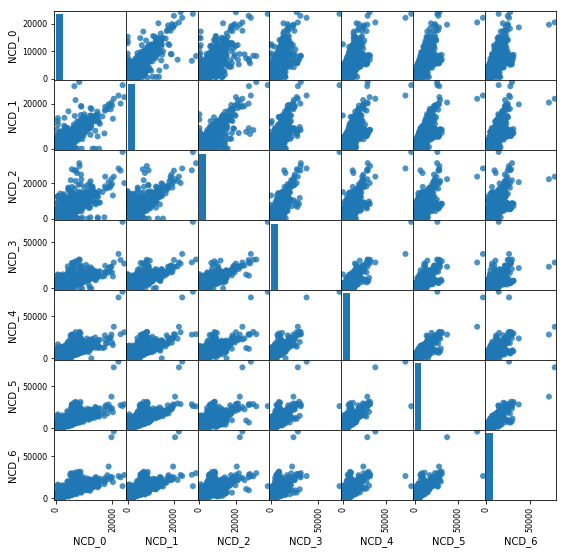

In [294]:
from pandas.plotting import scatter_matrix
attributes = twitter_data_x.iloc[:,:7]
scatter_matrix(attributes, figsize = (9,9), alpha = 0.8, marker = 'O')

In [295]:
 _, sample_data, _, sample_target = train_test_split(twitter_data_x, twitter_data_y, shuffle = True, test_size = 0.1)


In [296]:
print(sample_data.shape)   
print(sample_target.shape)

(58325, 77)
(58325, 1)


#### Splitting of dataset into 70 & 30 dataset fro training and test data

In [297]:
twitter_x_train, twitter_x_test, twitter_y_train, twitter_y_test = \
    train_test_split(sample_data, sample_target, random_state = 0,test_size = 0.3)



#### Min max Scaler used for scaling of dataset.
###### StandardScaler removes the mean and scales the data to unit variance. This scaler cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. The outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. Therefore, we prefer using MinMaxScaler to preserve the effects of outliers.

In [298]:
#scaling using min max scaler
scaler = MinMaxScaler()
twitter_data_x_scaled_train = scaler.fit_transform(twitter_x_train)
twitter_data_x_scaled_test = scaler.transform(twitter_x_test)

In [299]:
print("Size of training set: {}  size of test set:"
      " {}\n".format(twitter_data_x_scaled_train.shape[0], twitter_data_x_scaled_test.shape[0]))

Size of training set: 40827  size of test set: 17498



#### Bagging Regressor with Decision Tree and Random Forest

#### Decision tree regressor with bagging

In [300]:
dt_reg = DecisionTreeRegressor(random_state=0)
bag_tree_reg = BaggingRegressor(dt_reg, n_estimators=200, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0,oob_score = True)

bag_tree_reg.fit(twitter_data_x_scaled_train, twitter_y_train)
y_pred_tree_bag = bag_tree_reg.predict(twitter_data_x_scaled_test)
print(bag_tree_reg.oob_score_)
print('Train score: {:.2f}'.format(bag_tree_reg.score(twitter_data_x_scaled_train, twitter_y_train)))
print('Test score: {:.2f}'.format(bag_tree_reg.score(twitter_data_x_scaled_test, twitter_y_test)))

0.6388282580880692
Train score: 0.64
Test score: 0.50


#### Decision tree without bagging and  without pasting

In [301]:
#Score of out of objects can be used to analyse bcoz 37% of instances are left out in bagging and pasting
no_bag_tree_reg = DecisionTreeRegressor(random_state=0)
no_bag_tree_reg.fit(twitter_data_x_scaled_train, twitter_y_train)
y_pred_tree_no_bag = no_bag_tree_reg.predict(twitter_data_x_scaled_test)


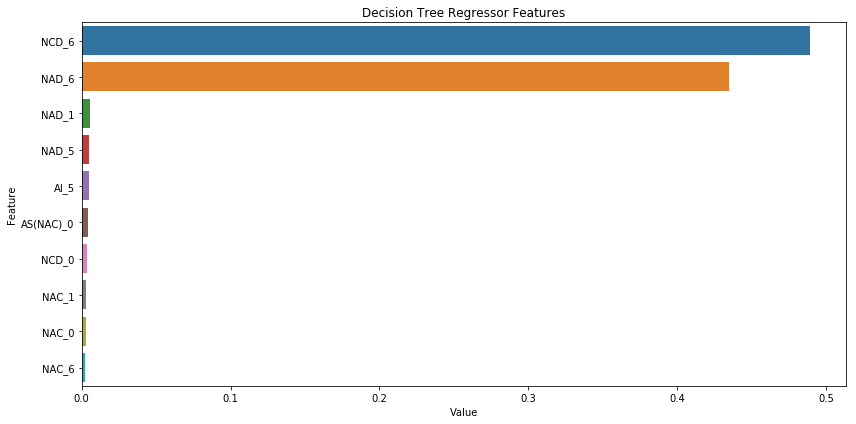

In [302]:
#feature importance plot
feature_imp_ada = pd.DataFrame(sorted(zip(no_bag_tree_reg.feature_importances_,twitter_data_x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_ada.sort_values(by="Value", ascending=False).head(10))
plt.title('Decision Tree Regressor Features')
plt.tight_layout()
plt.show()


##### random forest using splitter as random under decision tree regressor

#### Random Forest with bagging


In [303]:
rand_reg = DecisionTreeRegressor(splitter="random", max_leaf_nodes=16, random_state=0)
bag_rand_reg = BaggingRegressor(rand_reg, n_estimators=200, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0,oob_score=True)

In [304]:
bag_rand_reg.fit(twitter_data_x_scaled_train, twitter_y_train)
y_pred_rand = bag_rand_reg.predict(twitter_data_x_scaled_test)
bag_rand_reg.oob_score_

0.9098842484672126

In [305]:
#Direct Random Forest Regressor without bagging
bag_rnd_tree = RandomForestRegressor(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, random_state=0)
bag_rnd_tree.fit(twitter_data_x_scaled_train, twitter_y_train)
y_pred_rf = bag_rnd_tree.predict(twitter_data_x_scaled_test)
np.sum(y_pred_rand == y_pred_rf ) / len(y_pred_rand)
print('Train score: {:.2f}'.format(bag_rnd_tree.score(twitter_data_x_scaled_train, twitter_y_train)))
print('Test score: {:.2f}'.format(bag_rnd_tree.score(twitter_data_x_scaled_test, twitter_y_test)))


Train score: 0.94
Test score: 0.92


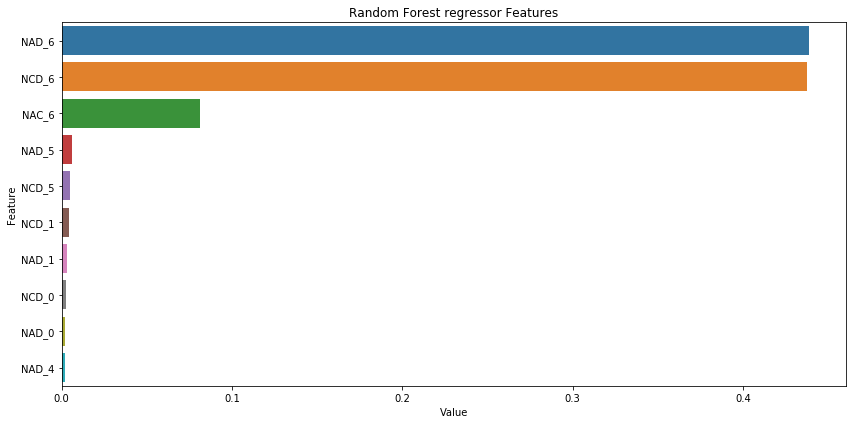

In [306]:
#Feature importance plot
feature_imp_ada = pd.DataFrame(sorted(zip(bag_rnd_tree.feature_importances_,twitter_data_x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_ada.sort_values(by="Value", ascending=False).head(10))
plt.title('Random Forest regressor Features')
plt.tight_layout()
plt.show()


#### Pasting Regressor with Decision tree and random forest

#### Decision tree with pasting


In [307]:
dt_reg = DecisionTreeRegressor(random_state=0)
pas_tree_reg = BaggingRegressor(dt_reg, n_estimators=200, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
#bootstrap = False is pasting
pas_tree_reg.fit(twitter_data_x_scaled_train, twitter_y_train)
y_pred_tree_pas = pas_tree_reg.predict(twitter_data_x_scaled_test)
print('Train score: {:.2f}'.format(pas_tree_reg.score(twitter_data_x_scaled_train, twitter_y_train)))
print('Test score: {:.2f}'.format(pas_tree_reg.score(twitter_data_x_scaled_test, twitter_y_test)))

Train score: 0.64
Test score: 0.50


#### Random Forest with pasting

In [308]:
rand_reg = DecisionTreeRegressor(splitter="random", max_leaf_nodes=16, random_state=0)
pas_rand_reg = BaggingRegressor(rand_reg, n_estimators=200, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)
#bootstrap = False is pasting
pas_rand_reg.fit(twitter_data_x_scaled_train, twitter_y_train)
y_pred_rand = pas_rand_reg.predict(twitter_data_x_scaled_test)
print('Train score: {:.2f}'.format(pas_rand_reg.score(twitter_data_x_scaled_train, twitter_y_train)))
print('Test score: {:.2f}'.format(pas_rand_reg.score(twitter_data_x_scaled_test, twitter_y_test)))

Train score: 0.94
Test score: 0.94


### 2 models with AdaBoosting

In [309]:
ada_reg_tree = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=200,learning_rate=0.5, random_state=0)
ada_reg_tree.fit(twitter_data_x_scaled_train, twitter_y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

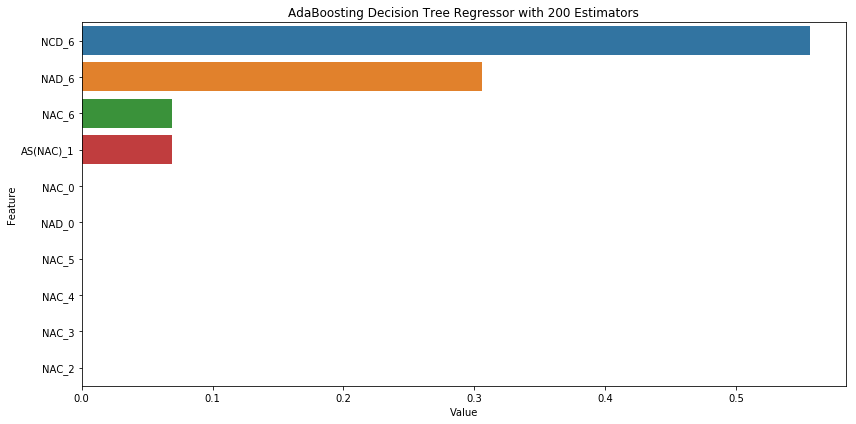

In [310]:
#Feature importance plot
feature_imp_ada = pd.DataFrame(sorted(zip(ada_reg_tree.feature_importances_,twitter_data_x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_ada.sort_values(by="Value", ascending=False).head(10))
plt.title('AdaBoosting Decision Tree Regressor with 200 Estimators')
plt.tight_layout()
plt.show()


In [311]:
print('Train score: {:.2f}'.format(ada_reg_tree.score(twitter_data_x_scaled_train, twitter_y_train)))
print('Test score: {:.2f}'.format(ada_reg_tree.score(twitter_data_x_scaled_test, twitter_y_test)))

Train score: 0.10
Test score: 0.33


In [312]:
ada_reg_rf = AdaBoostRegressor(RandomForestRegressor(max_depth=1), n_estimators=200,learning_rate=0.5, random_state=0)
ada_reg_rf.fit(twitter_data_x_scaled_train, twitter_y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [313]:
print('Train score: {:.2f}'.format(ada_reg_rf.score(twitter_data_x_scaled_train, twitter_y_train)))
print('Test score: {:.2f}'.format(ada_reg_rf.score(twitter_data_x_scaled_test, twitter_y_test)))

Train score: 0.28
Test score: 0.45


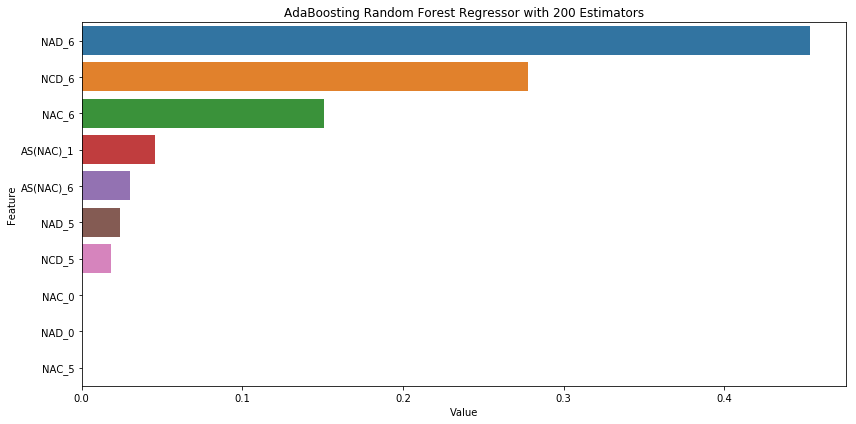

In [314]:
#Feature importance plot
feature_imp_ada = pd.DataFrame(sorted(zip(ada_reg_rf.feature_importances_,twitter_data_x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_ada.sort_values(by="Value", ascending=False).head(10))
plt.title('AdaBoosting Random Forest Regressor with 200 Estimators')
plt.tight_layout()
plt.show()


#### Gradient Boosting Regressor

In [315]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(twitter_data_x_scaled_train, twitter_y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(twitter_data_x_scaled_train, twitter_y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(twitter_data_x_scaled_test, twitter_y_test)))

Accuracy on training set: 0.859
Accuracy on test set: 0.855


In [316]:
gbrt.n_estimators

3

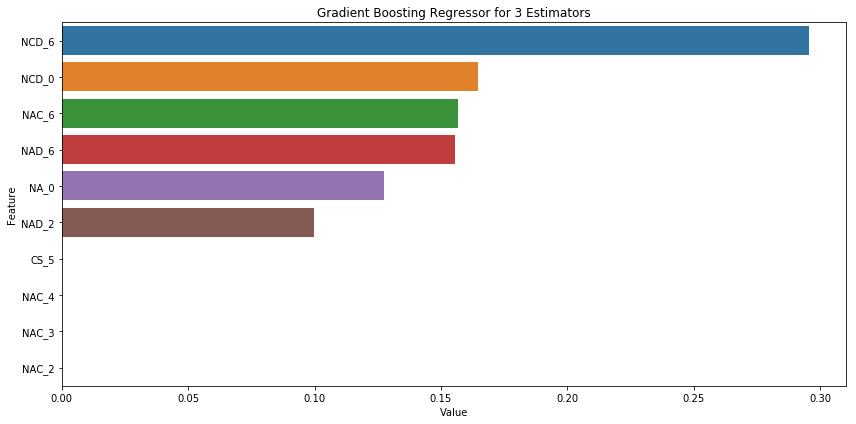

In [317]:
%matplotlib inline
#Feature importance plot
feature_imp_ada = pd.DataFrame(sorted(zip(gbrt.feature_importances_,twitter_data_x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_ada.sort_values(by="Value", ascending=False).head(10))
plt.title('Gradient Boosting Regressor for 3 Estimators')
plt.tight_layout()
plt.show()


In [318]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(twitter_data_x_scaled_train, twitter_y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

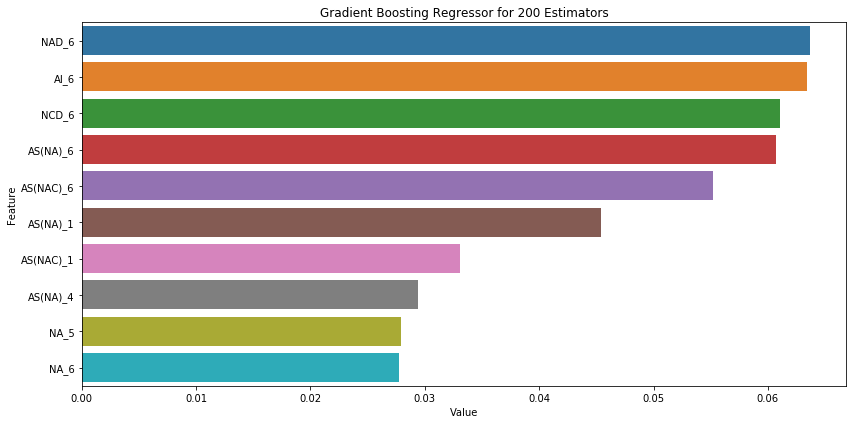

In [319]:
%matplotlib inline
#Feature importance plot
feature_imp_ada = pd.DataFrame(sorted(zip(gbrt_slow.feature_importances_,twitter_data_x.columns)), columns=['Value','Feature'])
plt.figure(figsize=(12,6))
sns.barplot(x="Value", y="Feature", data=feature_imp_ada.sort_values(by="Value", ascending=False).head(10))
plt.title('Gradient Boosting Regressor for 200 Estimators')
plt.tight_layout()
plt.show()


### PCA 

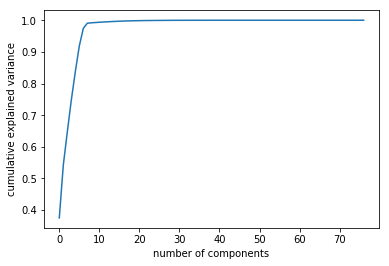

In [320]:
pca = PCA()
pca_train = pca.fit_transform(twitter_data_x_scaled_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

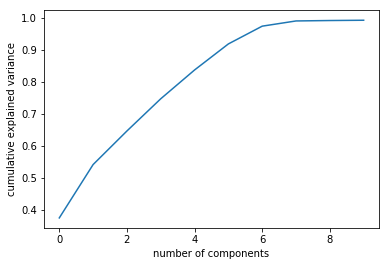

In [321]:
#based on the plot close to 1 explained variance is achieved approx 10 components

pca = PCA(n_components =10)
pca_train = pca.fit_transform(twitter_data_x_scaled_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [322]:
#based on eth plot close to 90% explnied variance is achieved by 6 components
pca = PCA(n_components = 6)
pca_train = pca.fit_transform(twitter_data_x_scaled_train)
pca_test = pca.fit_transform(twitter_data_x_scaled_test)

In [323]:
pca_train_inv = pca.inverse_transform(pca_train)
np.allclose(pca_train_inv, twitter_data_x_scaled_train)

False

In [324]:
pca_test_inv = pca.inverse_transform(pca_test)
np.allclose(pca_test_inv, twitter_data_x_scaled_test)

False

In [325]:
pca.components_


array([[-4.37562514e-03, -3.66301922e-03, -3.21496886e-03,
        -1.89336178e-03, -1.92206570e-03, -6.32922119e-03,
        -6.81126756e-03, -2.71625773e-03, -2.34578945e-03,
        -2.05587312e-03, -1.19704362e-03, -1.20345646e-03,
        -4.36015613e-03, -6.46767443e-03, -5.88894354e-03,
        -5.01649933e-03, -4.08270526e-03, -2.16807790e-03,
        -2.01894178e-03, -6.93369679e-03, -9.01797444e-03,
        -2.38789270e-01, -2.44599844e-01, -3.96558637e-01,
        -3.26688685e-01, -2.90386637e-01, -1.30969081e-01,
        -1.38967450e-01, -4.67990457e-03, -3.91420739e-03,
        -3.43139053e-03, -2.01235243e-03, -2.03518664e-03,
        -6.68533793e-03, -7.16207698e-03, -7.11716849e-03,
        -5.97445057e-03, -4.32516278e-03, -2.50374088e-03,
        -2.37298509e-03, -7.98195702e-03, -9.90605486e-03,
        -2.35562035e-01, -2.44499521e-01, -3.96577558e-01,
        -3.25854468e-01, -2.88956372e-01, -1.28407735e-01,
        -1.36051541e-01, -2.20686143e-03, -8.70326055e-0

In [326]:
pca.explained_variance_ratio_

array([0.37749622, 0.16742486, 0.1064632 , 0.09851538, 0.08652148,
       0.07976409])

In [327]:
np.sum(pca.explained_variance_ratio_)

0.91618523785895

In [328]:
1 - pca.explained_variance_ratio_.sum()

0.08381476214104999

In [329]:
print("Original shape: {}".format(str(twitter_data_x_scaled_train.shape)))
print("Reduced shape: {}".format(str(pca_train.shape)))

Original shape: (40827, 77)
Reduced shape: (40827, 6)


In [330]:
print("Original shape: {}".format(str(twitter_data_x_scaled_test.shape)))
print("Reduced shape: {}".format(str(pca_test.shape)))

Original shape: (17498, 77)
Reduced shape: (17498, 6)


#### Heap map for first 2 principal components

Text(0,0.5,'Principal components')

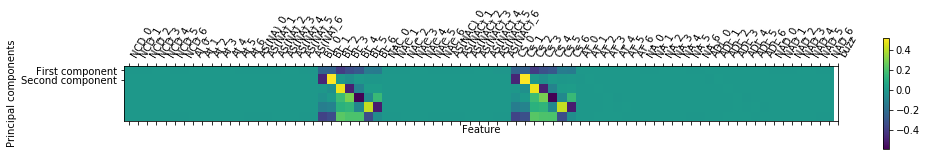

In [331]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(twitter_data.columns)),
twitter_data.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Regression methods applied on dataset after PCA

#### Running all models from Project 2 on PCA tranformed data

### KNN regressor with grid search cv parameters

#### Best parameters and best score from gridSearch CV

In [332]:
param_grid_knn = {'n_neighbors': [1,3,5,10,15,17,20,25,27]}
print("Parameter grid:\n{}".format(param_grid_knn))

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=4, return_train_score=True)


Parameter grid:
{'n_neighbors': [1, 3, 5, 10, 15, 17, 20, 25, 27]}


In [333]:
#KNN regressor

grid_search_knn.fit(pca_train,twitter_y_train)
#r2 score
train_score_array_knn = grid_search_knn.score(pca_train,twitter_y_train)
test_score_array_knn = grid_search_knn.score(pca_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_knn)
print("r2/variance Test: ",test_score_array_knn)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_knn.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_knn.cv_results_['mean_test_score']))

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

r2/variance Train:  0.8873486083995917
r2/variance Test:  0.3056504285541819
average of train: 0.8944957428780688
average of test: 0.8428744640777275
Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.86


### Capturing the report table for PCA transformed data

In [334]:
report_table=[]
report_table = report_table + [['knn',
                 grid_search_knn.best_params_,
                 train_score_array_knn, test_score_array_knn ,
                 np.mean(grid_search_knn.cv_results_['mean_train_score']),
                 np.mean(grid_search_knn.cv_results_['mean_test_score'])]]

#### Plotting of train and test score for KNN regressor for multiple n_neighbors values


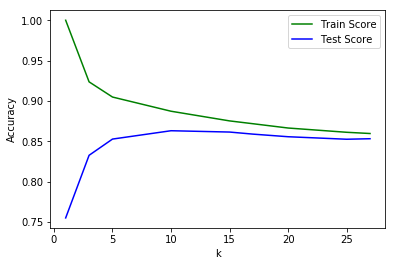

In [335]:
x_axis = [1, 3, 5, 10, 15, 17, 20, 25, 27]
%matplotlib inline
plt.plot(x_axis,grid_search_knn.cv_results_['mean_train_score'], label = 'Train Score', c = 'g')
plt.plot(x_axis, grid_search_knn.cv_results_['mean_test_score'], label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### Linear regression using cross validation

In [336]:

lreg = lm()
scores_train = cross_val_score(lreg, pca_train, twitter_y_train, cv=4,scoring='r2')
scores_test = cross_val_score(lreg, pca_test, twitter_y_test, cv=4,scoring='r2')

print("Average cross-validation score Train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score Test: {:.2f}".format(scores_test.mean()))


Average cross-validation score Train: 0.02
Average cross-validation score Test: 0.02


In [337]:
lreg.fit(pca_train, twitter_y_train)
#r2 score

train_score_array_linear = lreg.score(pca_train,twitter_y_train)
test_score_array_linear = lreg.score(pca_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_linear)
print("r2/variance Test: ",test_score_array_linear)

r2/variance Train:  0.02165102460354329
r2/variance Test:  0.016711445227382327


In [338]:
report_table = report_table+[['Linear regression',
                              "NA" ,
                              train_score_array_linear ,test_score_array_linear ,
                              scores_train.mean(),scores_test.mean()]]

[1 2 3 4]


Text(0,0.5,'cross validation score')

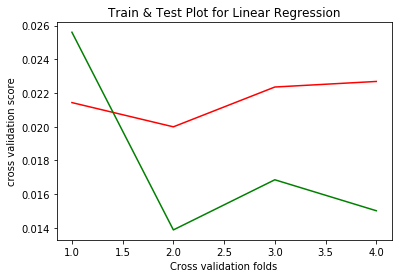

In [339]:
cv = np.arange(1,5)
print(cv)
plt.plot(cv,scores_train, c= 'r')
plt.plot(cv,scores_test, c= 'g')
plt.title("Train & Test Plot for Linear Regression")
plt.xlabel("Cross validation folds")
plt.ylabel("cross validation score")

### Ridge regression with GridSearchCV

#### Finding best parameters and appending into report table

In [340]:

#ridge
param_grid_ridge = {'alpha': [0.01, 0.05,0.1,1,0.001,10],
                    'max_iter': [5,10],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']}
print("Parameter grid:\n{}".format(param_grid_ridge))

grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=4, return_train_score=True)

grid_search_ridge.fit(pca_train,twitter_y_train)
twitter_y_test_ridge = grid_search_ridge.predict(pca_test)
#r2 score

train_score_array_ridge = grid_search_ridge.score(pca_train,twitter_y_train)
test_score_array_ridge = grid_search_ridge.score(pca_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_ridge)
print("r2/variance Test: ",test_score_array_ridge)
#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_ridge.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_ridge.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_ridge.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))

Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 1, 0.001, 10], 'max_iter': [5, 10], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']}
r2/variance Train:  0.021650983189306694
r2/variance Test:  0.01671232194246497
average of train: 0.021410032967722703
average of test: 0.021358972918718237

Best parameters: {'alpha': 10, 'max_iter': 5, 'solver': 'sparse_cg'}

Best cross-validation score: 0.02


In [341]:
report_table = report_table+[['Ridge regression',
                              grid_search_ridge.best_params_,
                              train_score_array_ridge ,test_score_array_ridge,
                              np.mean(grid_search_ridge.cv_results_['mean_train_score']),np.mean(grid_search_ridge.cv_results_['mean_test_score'])]]

### Lasso regression with GridSearchCV

#### Selecting best parameters for lasso from gridsearchCV

In [342]:
#lasso
param_grid_lasso = {'alpha': [0.01, 0.05,0.1,0.001,10],
                    'max_iter': [50,100]}
print("Parameter grid:\n{}".format(param_grid_lasso))

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=4, return_train_score=True)

grid_search_lasso.fit(pca_train,twitter_y_train)
twitter_y_test_lasso = grid_search_lasso.predict(pca_test)
#r2_Score
train_score_array_lasso = grid_search_lasso.score(pca_train,twitter_y_train)
test_score_array_lasso = grid_search_lasso.score(pca_test,twitter_y_test)
print("r2/variance Train: ",train_score_array_lasso)
print("r2/variance Test: ",test_score_array_lasso)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_lasso.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_lasso.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_lasso.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))


Parameter grid:
{'alpha': [0.01, 0.05, 0.1, 0.001, 10], 'max_iter': [50, 100]}
r2/variance Train:  0.02165100666698816
r2/variance Test:  0.016712476450080782
average of train: 0.021001355390140863
average of test: 0.020953507474547595

Best parameters: {'alpha': 0.01, 'max_iter': 50}

Best cross-validation score: 0.02


In [343]:
report_table = report_table+[['Lasso regression',
                              grid_search_lasso.best_params_ ,
                              train_score_array_lasso,test_score_array_lasso,
                              np.mean(grid_search_lasso.cv_results_['mean_train_score']),
                              np.mean(grid_search_lasso.cv_results_['mean_test_score'])]]

### SGD Regressor with GridSearchCV parameters

#### Finding best parameters and appending the value to report_table

In [344]:
#sgd regressor
param_grid_sgd = {'penalty': ['l1','l2'],
                  'alpha': [0.01, 0.05, 0.1, 0.001, 10],
                  'learning_rate': ['constant','optimal','invscaling']
                  }
print("Parameter grid:\n{}".format(param_grid_sgd))

grid_search_sgd = GridSearchCV(SGDRegressor(), param_grid_sgd, cv=4, return_train_score=True)

grid_search_sgd.fit(pca_train,twitter_y_train)
twitter_y_test_sgd = grid_search_sgd.predict(pca_test)
#r2 score
train_score_array_sgd = grid_search_sgd.score(pca_train, twitter_y_train)
test_score_array_sgd = grid_search_sgd.score(pca_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_sgd)
print("r2/variance Test: ",test_score_array_sgd)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_sgd.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_sgd.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_sgd.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_sgd.best_score_))


Parameter grid:
{'penalty': ['l1', 'l2'], 'alpha': [0.01, 0.05, 0.1, 0.001, 10], 'learning_rate': ['constant', 'optimal', 'invscaling']}
r2/variance Train:  0.02164400208648565
r2/variance Test:  0.01672056350470319
average of train: 0.01583326191952143
average of test: 0.015586245749487321

Best parameters: {'alpha': 0.1, 'learning_rate': 'optimal', 'penalty': 'l1'}

Best cross-validation score: 0.02


In [345]:
report_table = report_table+[['SGD regressor',
                              grid_search_sgd.best_params_,
                              train_score_array_sgd,test_score_array_sgd,
                              np.mean(grid_search_sgd.cv_results_['mean_train_score']),
                              np.mean(grid_search_sgd.cv_results_['mean_test_score'])]]

### Polynomial Regression with GridSearchCV 

#### Finding best parameters and appending metrics into report_table

##### Plotting the distribution of x and y values

In [346]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         lm(**kwargs))

Text(0.5,1,'NCD_0')

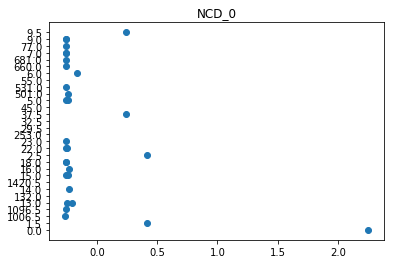

In [347]:
#plot for NCD_0 against first 30 records of y_train
X_train_1 = pca_train[0:30,0].reshape(-1,1)
plt.scatter(X_train_1,twitter_y_train[0:30])
plt.title("NCD_0")

In [348]:
#degrees from 1 to 3
param_poly = {'polynomialfeatures__degree': np.arange(1,3)
              }

grid_search_poly = GridSearchCV(PolynomialRegression(), param_poly, cv=4)
grid_search_poly.fit(pca_train, twitter_y_train)
#r2 score
train_score_array_poly = grid_search_poly.score(pca_train, twitter_y_train)
test_score_array_poly = grid_search_poly.score(pca_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_poly)
print("r2/variance Test: ",test_score_array_poly)
#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_poly.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_poly.cv_results_['mean_test_score']))

print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))



r2/variance Train:  0.04957912320473512
r2/variance Test:  0.027335160048462592
average of train: 0.03565953793941219
average of test: 0.03526699277233171
Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: 0.05


#### Plot for train and test scores of polynomial regression

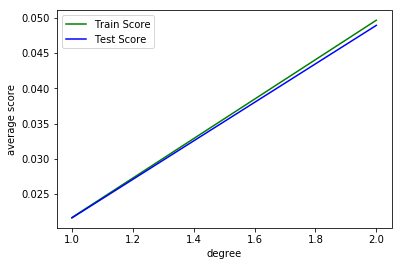

In [349]:
x_axis = range(1,3)
%matplotlib inline

plt.plot(x_axis, grid_search_poly.cv_results_['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_axis, grid_search_poly.cv_results_['mean_test_score'], c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('average score')
plt.legend()

In [350]:
report_table = report_table+[['Polynomial regression',
                              grid_search_poly.best_params_,
                              train_score_array_poly,test_score_array_poly,
                              np.mean(grid_search_poly.cv_results_['mean_train_score']),
                              np.mean(grid_search_poly.cv_results_['mean_test_score'])]]

### Decision tree with GridSearchCv parameters

#### Finding best parameters and appending metrics into report_table

In [351]:
#decision tree
n_features = 77
param_grid_tree = {'max_depth': [3,5,8,15],
                  'min_samples_split': [2,4,6,10],
                  'min_samples_leaf': [2,4,6,10],
                  'max_features': ['auto','sqrt','log2'],
                  'max_leaf_nodes': [5,10,15]
              }
print("Parameter grid:\n{}".format(param_grid_tree))

grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=4, return_train_score=True)
grid_search_tree.fit(pca_train, twitter_y_train)
twitter_y_test_dtree = grid_search_tree.predict(pca_test)

#r2 score
train_score_array_dtree = grid_search_tree.score(pca_train, twitter_y_train)
test_score_array_dtree = grid_search_tree.score(pca_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_dtree)
print("r2/variance Test: ",test_score_array_dtree)
#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_tree.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_tree.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_tree.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_tree.best_score_))


Parameter grid:
{'max_depth': [3, 5, 8, 15], 'min_samples_split': [2, 4, 6, 10], 'min_samples_leaf': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [5, 10, 15]}
r2/variance Train:  0.8349343313744716
r2/variance Test:  0.4947796795435113
average of train: 0.7326397511282478
average of test: 0.6970068222239729

Best parameters: {'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 15, 'min_samples_leaf': 10, 'min_samples_split': 4}

Best cross-validation score: 0.82


In [352]:
report_table = report_table+[['Decision Tree',
                              grid_search_tree.best_params_,
                              train_score_array_dtree,test_score_array_dtree,
                              np.mean(grid_search_tree.cv_results_['mean_train_score']),
                              np.mean(grid_search_tree.cv_results_['mean_test_score'])]]


### Linear SVR GridSearchCV 

#### Finding best parameters and appending metrics into report_table

In [353]:
#LinearSVR

param_svr = {'C': [0.001, 0.01, 0.1, 10, 100,2000],
             'epsilon': [0.1,0.001,20,10]
             }
print("Parameter grid:\n{}".format(param_svr))

grid_search_svm_l = GridSearchCV(LinearSVR(), param_svr, cv=4, return_train_score=True)
grid_search_svm_l.fit(pca_train,twitter_y_train)
# evaluate the Linear SVR on parameters
#r2 score
train_score_array_lsvr = grid_search_svm_l.score(pca_train, twitter_y_train)
test_score_array_lsvr = grid_search_svm_l.score(pca_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_lsvr)
print("r2/variance Test: ",test_score_array_lsvr)

#average score for train and test dataset as per cross validation

print("average of train:",np.mean(grid_search_svm_l.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_svm_l.cv_results_['mean_test_score']))

print("\nBest parameters: {}".format(grid_search_svm_l.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_svm_l.best_score_))




Parameter grid:
{'C': [0.001, 0.01, 0.1, 10, 100, 2000], 'epsilon': [0.1, 0.001, 20, 10]}
r2/variance Train:  -0.059421841461746894
r2/variance Test:  -0.04451386567449811
average of train: -0.07160056126380628
average of test: -0.07217290565020176

Best parameters: {'C': 100, 'epsilon': 20}

Best cross-validation score: -0.06


In [354]:
report_table = report_table+[['Linear SVR',
                              grid_search_svm_l.best_params_,
                              train_score_array_lsvr,test_score_array_lsvr,
                              np.mean(grid_search_svm_l.cv_results_['mean_train_score']),
                              np.mean(grid_search_svm_l.cv_results_['mean_test_score'])]]

### Kernel SVR with GridSearchCV

#### Finding best parameters and appending the metrics into report_table

In [355]:
#SVR with kernel

param_ksvr= {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_ksvr))


grid_search_svm_k = GridSearchCV(SVR(), param_ksvr, cv=4, return_train_score=True)
grid_search_svm_k.fit(pca_train, twitter_y_train)
twitter_y_test_svr = grid_search_svm_k.predict(pca_train)

#r2 score
train_score_array_svr = grid_search_svm_k.score(pca_train, twitter_y_train)
test_score_array_svr = grid_search_svm_k.score(pca_test, twitter_y_test)
print("r2/variance Train: ",train_score_array_svr)
print("r2/variance Test: ",test_score_array_svr)


#average score for train and test dataset as per cross validatioN

print("average of train:",np.mean(grid_search_svm_k.cv_results_['mean_train_score']))
print("average of test:",np.mean(grid_search_svm_k.cv_results_['mean_test_score']))

# evaluate the SVR on parameters
print("\nBest parameters: {}".format(grid_search_svm_k.best_params_))
print("\nBest cross-validation score: {:.2f}".format(grid_search_svm_k.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
r2/variance Train:  0.5537413718093449
r2/variance Test:  0.4559586865116813
average of train: -0.04747301460160949
average of test: -0.048015578669378285

Best parameters: {'C': 100, 'gamma': 100}

Best cross-validation score: 0.48


In [356]:
report_table = report_table+[['SVR with kernel',
                              grid_search_svm_k.best_params_,
                              train_score_array_svr,test_score_array_svr,
                              np.mean(grid_search_svm_k.cv_results_['mean_train_score']),
                              np.mean(grid_search_svm_k.cv_results_['mean_test_score'])]]

In [357]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model Best parameter', 'Train r2 score', 'Test r2 score',
                                              'Train average score', 'Test average score'])
report.index = report['Model name']

report


,Model name,Model Best parameter,Train r2 score,Test r2 score,Train average score,Test average score
Model name,,,,,,
knn,knn,{'n_neighbors': 10},0.887349,0.305650,0.894496,0.842874
Linear regression,Linear regression,NA,0.021651,0.016711,0.021614,0.017832
Ridge regression,Ridge regression,"{'alpha': 10, 'max_iter': 5, 'solver': 'sparse_cg'}",0.021651,0.016712,0.021410,0.021359
Lasso regression,Lasso regression,"{'alpha': 0.01, 'max_iter': 50}",0.021651,0.016712,0.021001,0.020954
SGD regressor,SGD regressor,"{'alpha': 0.1, 'learning_rate': 'optimal', 'penalty': 'l1'}",0.021644,0.016721,0.015833,0.015586
Polynomial regression,Polynomial regression,{'polynomialfeatures__degree': 2},0.049579,0.027335,0.035660,0.035267
Decision Tree,Decision Tree,"{'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 15, 'min_samples_leaf': 10, 'min_samples_split': 4}",0.834934,0.494780,0.732640,0.697007
Linear SVR,Linear SVR,"{'C': 100, 'epsilon': 20}",-0.059422,-0.044514,-0.071601,-0.072173
SVR with kernel,SVR with kernel,"{'C': 100, 'gamma': 100}",0.553741,0.455959,-0.047473,-0.048016


##### Model report from Project 2

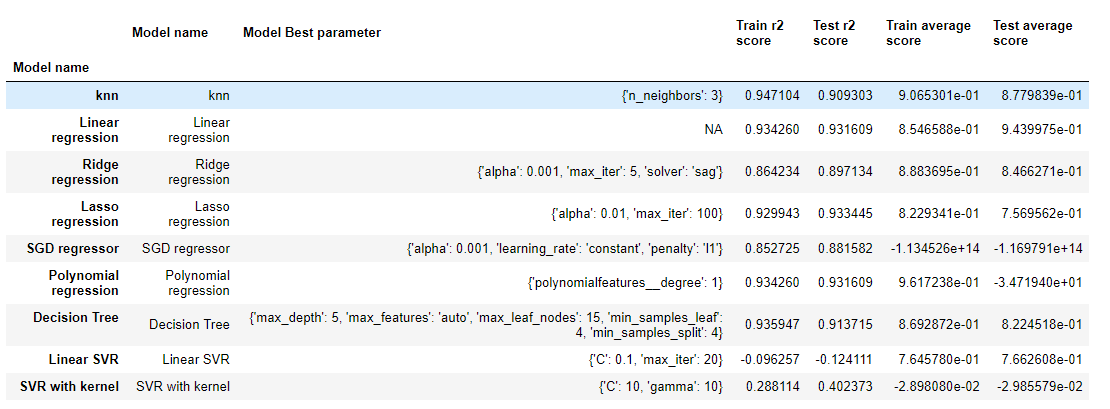

###### Comparing both the tables we find that train and test r2/average scores has not improved for most of the models after applying PCA on data.

### Neural Network Model

In [380]:
# create model

model = Sequential()
model.add(Dense(256, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])


In [384]:
model_fit=model.fit(twitter_data_x_scaled_train, twitter_y_train, epochs = 100, batch_size = 20,
          verbose=1)


Epoch 1/100
40827/40827 [==============================] - 6s 148us/step - loss: 21899.2574 - mean_squared_error: 21899.2574
Epoch 2/100
40827/40827 [==============================] - 6s 156us/step - loss: 22399.4059 - mean_squared_error: 22399.4059
Epoch 3/100
40827/40827 [==============================] - 6s 155us/step - loss: 21199.7229 - mean_squared_error: 21199.7229
Epoch 4/100
40827/40827 [==============================] - 6s 155us/step - loss: 20959.2547 - mean_squared_error: 20959.2547
Epoch 5/100
40827/40827 [==============================] - 6s 153us/step - loss: 21351.3119 - mean_squared_error: 21351.3119
Epoch 6/100
40827/40827 [==============================] - 6s 139us/step - loss: 20956.3046 - mean_squared_error: 20956.3046
Epoch 7/100
40827/40827 [==============================] - 6s 136us/step - loss: 21111.8997 - mean_squared_error: 21111.8997
Epoch 8/100
40827/40827 [==============================] - 6s 135us/step - loss: 20771.1680 - mean_squared_error: 20771.1680


40827/40827 [==============================] - 6s 155us/step - loss: 17541.7895 - mean_squared_error: 17541.7895
Epoch 67/100
40827/40827 [==============================] - 6s 158us/step - loss: 17400.2323 - mean_squared_error: 17400.2323
Epoch 68/100
40827/40827 [==============================] - 7s 160us/step - loss: 16941.8110 - mean_squared_error: 16941.8110
Epoch 69/100
40827/40827 [==============================] - 6s 156us/step - loss: 17433.9292 - mean_squared_error: 17433.9292
Epoch 70/100
40827/40827 [==============================] - 5s 135us/step - loss: 17039.1593 - mean_squared_error: 17039.1593
Epoch 71/100
40827/40827 [==============================] - 5s 132us/step - loss: 17596.2337 - mean_squared_error: 17596.2337
Epoch 72/100
40827/40827 [==============================] - 6s 143us/step - loss: 16847.0664 - mean_squared_error: 16847.0664
Epoch 73/100
40827/40827 [==============================] - 6s 152us/step - loss: 17219.8754 - mean_squared_error: 17219.8754
Epoch

In [385]:
model.evaluate(twitter_data_x_scaled_test, twitter_y_test)

17498/17498 [==============================] - 1s 51us/step


[20364.61581239865, 20364.61581239865]

In [389]:
y_train_predict = model.predict(twitter_data_x_scaled_train)
y_test_predict = model.predict(twitter_data_x_scaled_test)

In [390]:
print('Train score: {:.2f}'.format(r2_score(twitter_y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(twitter_y_test, y_test_predict)))

Train score: 0.95
Test score: 0.95


In [404]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 256)               19968     
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 129       
Total params: 52,993
Trainable params: 52,993
Non-trainable params: 0
_________________________________________________________________


In [405]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 77),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'RandomNormal',
    'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
   'kernel_regularizer': None,
   'name': 'dense_58',
   'trainable': True,
   'units': 256,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'RandomNormal',
    'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
   'kernel_regularizer': None,
   'name': 'dense_59',
   'trainable': True,
   'units': 128,
   'use_bias': T

#### Neural network with gridsearchcv

In [412]:
def ann_model():
    model = Sequential()
    model.add(Dense(256, input_dim=77, kernel_initializer='normal', activation='relu'))
    model.add(Dense(128,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])
    return model

In [413]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn = ann_model, verbose = 0)

param_grid = {'batch_size':[50,100,150] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [414]:
grid_search_result = grid_search.fit(twitter_data_x_scaled_train, twitter_y_train)


In [415]:
grid_search.best_params_

{'batch_size': 100, 'epochs': 50}